# Financial Well-Being Survey Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import Ridge

In [2]:
df = pd.read_csv('/Users/zealpatel/Downloads/INFO348/FINAL348/NFWBS_PUF_2016_data.csv')

In [3]:
selected_columns = [
    'FS1_6', 'MANAGE1_2', 'FS1_7',
    'FWB1_3', 'FWB2_2', 'SWB_1',
    'generation', 'PPETHM', 'FWB1_4', 'FWB2_1',
    'SWB_2', 'SWB_1', 'FWB1_1', 'FWB2_3',
]

new_df = df[selected_columns]
new_df

,FS1_6,MANAGE1_2,FS1_7,FWB1_3,FWB2_2,SWB_1,generation,PPETHM,FWB1_4,FWB2_1,SWB_2,SWB_1,FWB1_1,FWB2_3
0,3,4,4,3,3,5,1,1,3,2,5,5,3,2
1,3,4,2,3,2,6,3,1,3,2,6,6,2,2
2,3,3,3,3,3,4,3,2,3,3,3,4,3,3
3,3,4,3,3,3,6,3,1,3,3,6,6,3,3
4,3,3,3,3,3,4,4,3,3,3,4,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,4,3,4,1,3,6,2,2,3,2,7,6,3,2
6390,4,4,4,2,3,7,2,2,4,2,7,7,3,2
6391,3,5,4,3,4,5,4,1,3,2,6,5,3,1
6392,3,3,4,3,3,5,4,4,2,3,5,5,2,1


After reading in the dataset, we did data wrangling by first subsetting the columns we would like to use to clean the data up. We found 14 columns in the codebook that would help us to answer our research questions.

In [4]:
# Find rows where any value is negative
rows_to_remove = new_df[(new_df < 0).any(axis=1)]

# Remove identified rows
new_df = new_df.drop(rows_to_remove.index)

# Reset index after removing rows
new_df = new_df.reset_index(drop=True)
new_df

,FS1_6,MANAGE1_2,FS1_7,FWB1_3,FWB2_2,SWB_1,generation,PPETHM,FWB1_4,FWB2_1,SWB_2,SWB_1,FWB1_1,FWB2_3
0,3,4,4,3,3,5,1,1,3,2,5,5,3,2
1,3,4,2,3,2,6,3,1,3,2,6,6,2,2
2,3,3,3,3,3,4,3,2,3,3,3,4,3,3
3,3,4,3,3,3,6,3,1,3,3,6,6,3,3
4,3,3,3,3,3,4,4,3,3,3,4,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6308,4,3,4,1,3,6,2,2,3,2,7,6,3,2
6309,4,4,4,2,3,7,2,2,4,2,7,7,3,2
6310,3,5,4,3,4,5,4,1,3,2,6,5,3,1
6311,3,3,4,3,3,5,4,4,2,3,5,5,2,1


We found in the dataset that there were rows with negative values which we wanted to get rid of to further clean the dataset. In the code above, we first found the rows with negative values, removed them, and then reset the index.

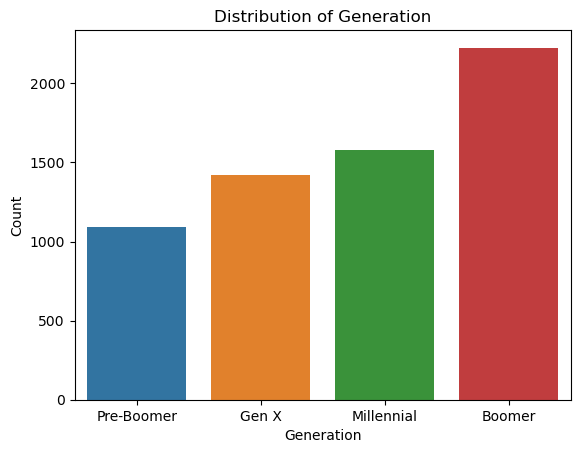

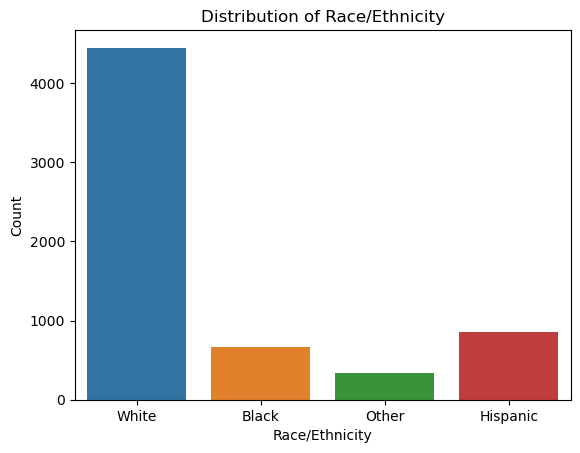

In [5]:
# Mapping for Generation
generation_mapping = {1: 'Pre-Boomer', 2: 'Boomer', 3: 'Gen X', 4: 'Millennial'}
new_df['generation'] = new_df['generation'].map(generation_mapping)

# Mapping for Race/Ethnicity
race_mapping = {1: 'White', 2: 'Black', 3: 'Other', 4: 'Hispanic'}
new_df['PPETHM'] = new_df['PPETHM'].map(race_mapping)

# Distribution of Generation
sns.countplot(x='generation', data=new_df)
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Distribution of Generation')
plt.show()

# Distribution of Race/Ethnicity
sns.countplot(x='PPETHM', data=new_df)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Distribution of Race/Ethnicity')
plt.show()

For some exploratory analysis, we have plots showing the distribution of race and generation within the dataset. This gives us a good idea of what kind of distribution we are looking at in a visual sense.

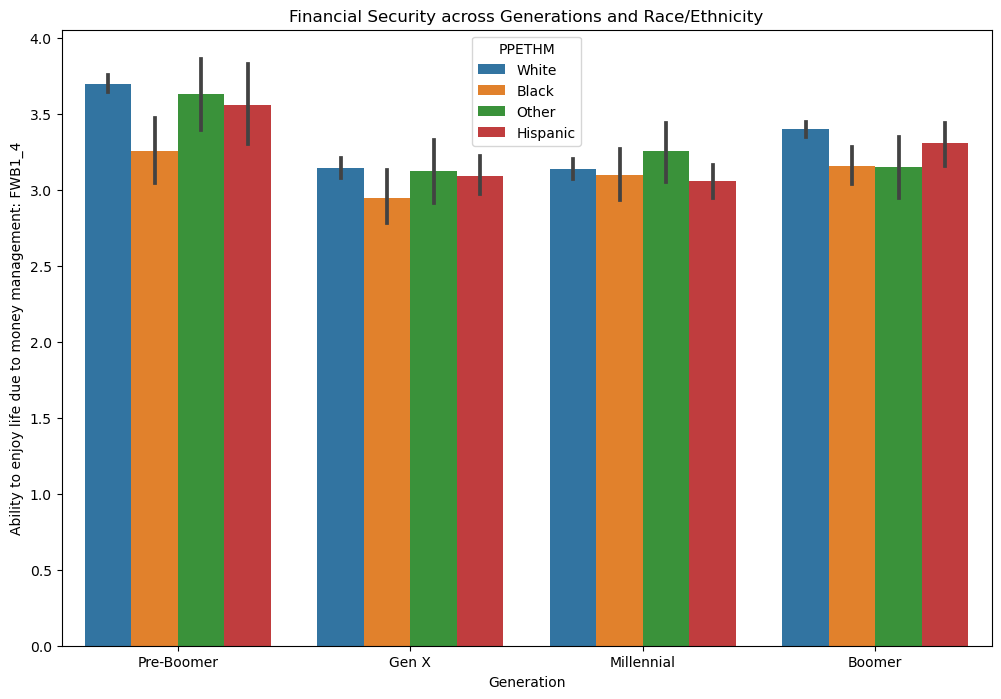

In [6]:
selected_columns = [
    'FS1_6', 'MANAGE1_2', 'FS1_7',
    'FWB1_3', 'FWB2_2', 'SWB_1',
    'generation', 'PPETHM', 'FWB1_4', 'FWB2_1',
    'SWB_2', 'SWB_1', 'FWB1_1', 'FWB2_3'
]

new_df = df[selected_columns]

rows_to_remove = new_df[(new_df < 0).any(axis=1)]

new_df = new_df.drop(rows_to_remove.index)

graphdf = new_df.reset_index(drop=True)


#Is there a correlation between generations, race/ethnicity and level of financial security?
generation_mapping = {1: 'Pre-Boomer', 2: 'Boomer', 3: 'Gen X', 4: 'Millennial'}
ethnicity_mapping = {1: 'White', 2: 'Black', 3: 'Other', 4: 'Hispanic'}

graphdf['generation'] = graphdf['generation'].map(generation_mapping)
graphdf['PPETHM'] = graphdf['PPETHM'].map(ethnicity_mapping)

# Grouped Bar Plot for Financial Security across Generations and Race/Ethnicity
plt.figure(figsize=(12, 8))
sns.barplot(x='generation', y='FWB1_4', hue='PPETHM', data=graphdf)
plt.xlabel('Generation')
plt.ylabel('Ability to enjoy life due to money management: FWB1_4')
plt.title('Financial Security across Generations and Race/Ethnicity')
plt.show()

As part of our statistical associations, this grouped bar plot shows financial security across both generations and race. We can see that white people generally were able to enjoy life more due to their money management habits across all four generations. The highest general generation across all races were pre-boomers, which we found interesting.

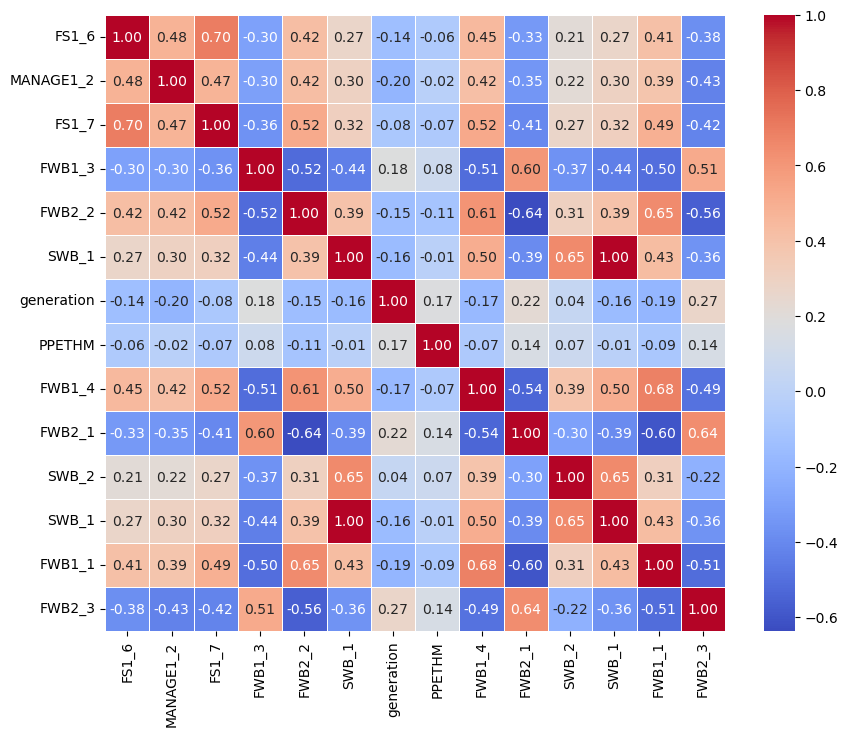

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, annot_kws={"size": 10})
plt.show()

This is a general heat correlation map as part of our statistical associations. All 14 variables are visible here before a deeper dive is done. We can see that across the board there are cool and medium tones of peach, which indicate a higher coorelation. There are also a lot of darker blue colors, which indicate that there is little to no correlation.

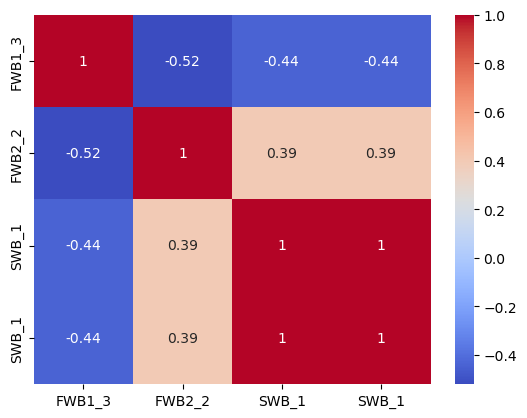

In [8]:
# How does general life satisfaction correlate with financial struggles?
# Quantitative analysis
correlation_life_satisfaction = new_df[['FWB1_3', 'FWB2_2', 'SWB_1']].corr()

# Visual analysis
sns.heatmap(correlation_life_satisfaction, annot=True, cmap="coolwarm")
plt.show()

This heat map allowed us to explore how perceptions of financial struggles ('FWB1_3') might be negatively correlated with life satisfaction ('SWB_1'). The negative correlation between SWB_1 and FWB1_3 suggests that individuals who report higher levels of financial struggles (FWB1_3) are, on average, more likely to report lower levels of life satisfaction (SWB_1).

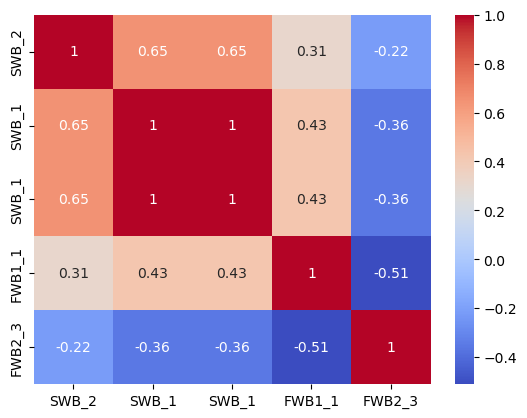

In [9]:
# What is the correlation between financial status and happiness/ a positive outlook on life?
# Quantitative analysis
correlation_happiness_outlook = new_df[['SWB_2', 'SWB_1', 'FWB1_1', 'FWB2_3']].corr()

# Visual analysis (heatmap for correlation matrix)
sns.heatmap(correlation_happiness_outlook, annot=True, cmap="coolwarm")
plt.show()

This heat map shows how financial status ('FWB1_1' and 'FWB2_3') correlates with happiness ('SWB_1' and 'SWB_2').The correlation coefficient between 'SWB_1' and 'FWB2_3' being -0.36 indicates a moderate negative correlation between these two variables. This implies that individuals who report being behind with their finances ('FWB2_3') are moderately likely to report lower life satisfaction ('SWB_1'). The correlation coefficient of -0.22 between 'FWB2_3' and 'SWB_2' suggests a weak negative correlation between these two variables. This implies that individuals who report being behind with their finances ('FWB2_3') are weakly likely to report lower optimism about their future ('SWB_2'). 

In [10]:
# How financially responsible is the majority of the population?
from scipy.stats import f_oneway

# ANOVA for financial responsibility variables
anova_financial_responsibility = f_oneway(new_df['FS1_6'], new_df['MANAGE1_2'], new_df['FS1_7'])

anova_financial_responsibility

F_onewayResult(statistic=20.132182574234644, pvalue=1.844958709141231e-09)

Our null hypothesis is that there is no significant difference between the means of the financial responsibility variables, and that the majority of the population is not financially responsible. The extremely small p-value suggests strong evidence against the null hypothesis. With such a small p-value, you can reject the null hypothesis and assume that the population is financially responsible. In summary, the ANOVA results suggest that there are significant variations in the means of the financial responsibility variables.

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

stacked_data = new_df[['FS1_6', 'MANAGE1_2', 'FS1_7']].stack()

labels = ['FS1_6'] * len(new_df) + ['MANAGE1_2'] * len(new_df) + ['FS1_7'] * len(new_df)
stacked_data = pd.DataFrame({'Value': stacked_data.values, 'Group': labels})

tukey_result = pairwise_tukeyhsd(stacked_data['Value'], stacked_data['Group'])

print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
 FS1_6     FS1_7  -0.0596 0.0023 -0.1011 -0.018   True
 FS1_6 MANAGE1_2  -0.0296 0.2164 -0.0712 0.0119  False
 FS1_7 MANAGE1_2   0.0299 0.2095 -0.0116 0.0715  False
------------------------------------------------------


There is a statistically significant difference in means between 'FS1_6' (the ability to keep oneself from spending too much) and 'FS1_7' (the ability to make oneself save). The negative meandiff suggests that, on average, respondents score lower on 'FS1_7' compared to 'FS1_6,' indicating a potential challenge in saving.

There is no statistically significant difference in means between 'FS1_6' and 'MANAGE1_2' (staying within a budget or spending plan). The p-value is greater than 0.05, suggesting that the observed difference is likely due to random variation.

There is no statistically significant difference in means between 'FS1_7' and 'MANAGE1_2.' The p-value is greater than 0.05, indicating that the observed difference in scores is not likely a result of a true difference in the population.

The significant difference between 'FS1_6' (the ability to keep oneself from spending too much) and 'FS1_7' (the ability to make oneself save) suggests that, on average, respondents may find it more challenging to save money compared to avoiding excessive spending.

In [12]:
selected_columns = [
    'FS1_6', 'MANAGE1_2', 'FS1_7',
    'FWB1_3', 'FWB2_2', 'SWB_1',
    'generation', 'PPETHM', 'FWB1_4', 'FWB2_1',
    'SWB_2', 'SWB_1', 'FWB1_1', 'FWB2_3'
]

new_df = df[selected_columns]
new_df


#Calculate means of each variable for each research question to see which aspect/variable related to each question
#has the highest average scores 

#How financially responsible is the majority of the population?
mean_FS1_6 = new_df['FS1_6'].mean()
mean_MANAGE1_2 = new_df['MANAGE1_2'].mean()
mean_FS1_7 = new_df['FS1_7'].mean()
print("Mean FS1_6:", mean_FS1_6)
print("Mean MANAGE1_2:", mean_MANAGE1_2)
print("Mean FS1_7:", mean_FS1_7)

#How does general life satisfaction correlate with financial struggles?
mean_FWB1_3 = new_df['FWB1_3'].mean()
mean_FWB2_2 = new_df['FWB2_2'].mean()
mean_SWB_1 = new_df['SWB_1'].mean()
print("Mean FWB1_3:", mean_FWB1_3)
print("Mean FWB2_2:", mean_FWB2_2)
print("Mean SWB_1:", mean_SWB_1)

#Is there a correlation between generations, race/ethnicity and level of financial security?
mean_generation = new_df['generation'].mean()
mean_PPETHM = new_df['PPETHM'].mean()
mean_FWB1_4 = new_df['FWB1_4'].mean()
mean_FWB2_1 = new_df['FWB2_1'].mean()
print("Mean Generation:", mean_generation)
print("Mean PPETHM:", mean_PPETHM)
print("Mean FWB1_4:", mean_FWB1_4)
print("Mean FWB2_1:", mean_FWB2_1)

#What is the correlation between financial status and happiness and a positive outlook on life 
mean_SWB_2 = new_df['SWB_2'].mean()
mean_SWB_1 = new_df['SWB_1'].mean()
mean_FWB1_1 = new_df['FWB1_1'].mean()
mean_FWB2_3 = new_df['FWB2_3'].mean()
print("Mean SWB_2:", mean_SWB_2)
print("Mean SWB_1:", mean_SWB_1)
print("Mean FWB1_1:", mean_FWB1_1)
print("Mean FWB2_3:", mean_FWB2_3)


Mean FS1_6: 3.762277134813888
Mean MANAGE1_2: 3.80716296527995
Mean FS1_7: 3.6958085705348767
Mean FWB1_3: 2.5312793243665936
Mean FWB2_2: 3.3881764153894274
Mean SWB_1: SWB_1    5.353769
SWB_1    5.353769
dtype: float64
Mean Generation: 2.549890522364717
Mean PPETHM: 1.6227713481388801
Mean FWB1_4: 3.2857366280888334
Mean FWB2_1: 2.335939943697216
Mean SWB_2: 5.3622145761651545
Mean SWB_1: SWB_1    5.353769
SWB_1    5.353769
dtype: float64
Mean FWB1_1: 3.048013762902721
Mean FWB2_3: 2.029246168282765


According to the results above, we can see that the variable with the highest mean value is SWB_2 (I am optimistic about my future). This suggests that the majority of the participants are optimistic and have a positive outlook on life. We can also see that the variable with the lowest mean value is FWB2_3 (I am behind with my finances), which suggests that most of the participants do not struggle with finances, hence they tend to be more happier and have a more positive outlook on life.

In [13]:
#How financially responsible is the majority of the population?
freq_FS1_6 = df['FS1_6'].value_counts().sort_index()
freq_MANAGE1_2 = df['MANAGE1_2'].value_counts().sort_index()
freq_FS1_7 = df['FS1_7'].value_counts().sort_index()
print("Frequency distribution of FS1_6:", freq_FS1_6)
print("Frequency distribution of MANAGE1_2", freq_MANAGE1_2)
print("Frequency distribution of FS1_7", freq_FS1_7)

Frequency distribution of FS1_6: -1      10
 1     120
 2     382
 3    1828
 4    2572
 5    1482
Name: FS1_6, dtype: int64
Frequency distribution of MANAGE1_2 -1      12
 1     296
 2     381
 3    1397
 4    2434
 5    1874
Name: MANAGE1_2, dtype: int64
Frequency distribution of FS1_7 -1       8
 1     152
 2     506
 3    1876
 4    2413
 5    1439
Name: FS1_7, dtype: int64


Looking at the frequency distributions for the variables used in the research question "How financially responsible is the majority of the population", we can see that most people selected 4 for each variable, indicating that they can keep themselves from spending too much, they stayed within their budget, and knew how to make themselves save money very well

In [14]:
#How does general life satisfaction correlate with financial struggles
freq_FWB1_3 = df['FWB1_3'].value_counts().sort_index()
freq_FWB2_2 = df['FWB2_2'].value_counts().sort_index()
freq_SWB_1 = df['SWB_1'].value_counts().sort_index()
print("Frequency distribution of FWB1_3:", freq_FWB1_3)
print("Frequency distribution of FWB2_2", freq_FWB2_2)
print("Frequency distribution of SWB_1", freq_SWB_1)

Frequency distribution of FWB1_3: -4       1
-1       8
 1    1382
 2    1976
 3    1790
 4     692
 5     545
Name: FWB1_3, dtype: int64
Frequency distribution of FWB2_2 -4       1
-1      13
 1     541
 2    1012
 3    1779
 4    1461
 5    1587
Name: FWB2_2, dtype: int64
Frequency distribution of SWB_1 -4       1
-1      30
 1     154
 2     152
 3     335
 4     803
 5    1458
 6    1926
 7    1535
Name: SWB_1, dtype: int64


In this frequency distribution, we're looking at the variables FWB1_3 (because of my money situation, I will never have the things I want in life), FWB2_2 (I have money left over at the end of the month), and SWB_1 (I am satisfied with my life). The distributions of these variables indicate that very little of the majority of people never have the things they want in life due to their financial situation. These results also indicate that the majority of people sometimes have money left at the end of the month, and that they strongly agree that they are satisfied with their life. This suggests that most people are happy in their lives and that they are not in a very bad financial situation. 

In [15]:
#Is there a correlation between generations and race/ethnicity and level of financial security
freq_generation = df['generation'].value_counts().sort_index()
freq_PPETHM = df['PPETHM'].value_counts().sort_index()
freq_FWB1_4 = df['FWB1_4'].value_counts().sort_index()
freq_FWB2_1 = df['FWB2_1'].value_counts().sort_index()
print("Frequency distribution of Generation:", freq_generation)
print("Frequency distribution of Race/Ethnicity", freq_PPETHM)
print("Frequency distribution of FWB1_4", freq_FWB1_4)
print("Frequency distribution of FWB2_1", freq_FWB2_1)

Frequency distribution of Generation: 1    1112
2    2253
3    1430
4    1599
Name: generation, dtype: int64
Frequency distribution of Race/Ethnicity 1    4498
2     685
3     336
4     875
Name: PPETHM, dtype: int64
Frequency distribution of FWB1_4 -4       1
-1      10
 1     367
 2     870
 3    2456
 4    1902
 5     788
Name: FWB1_4, dtype: int64
Frequency distribution of FWB2_1 -4       1
-1       9
 1    1776
 2    2095
 3    1501
 4     580
 5     432
Name: FWB2_1, dtype: int64


This frequency distribution incorporates the race/ethnicity of the population and what generation they are from and what their level of financial security is. We can see that from this dataset, the majority of people are from the "Boomer" generation and that they are of White/Non-Hispanic ethnicity. We can also see that people are neither strongly agreeing nor disagreeing on whether they can enjoy life based on the way they're managing money, and that giving a gift rarely strains their finances for a month.

In [16]:
#Correlation between financial status and outlook on life
freq_SWB_2 = df['SWB_2'].value_counts().sort_index()
freq_SWB_1 = df['SWB_1'].value_counts().sort_index()
freq_FWB1_1 = df['FWB1_1'].value_counts().sort_index()
freq_FWB2_3 = df['FWB2_3'].value_counts().sort_index()
print("Frequency distribution of SWB_2:", freq_SWB_2)
print("Frequency distribution of SWB_1", freq_SWB_1)
print("Frequency distribution of FWB1_1", freq_FWB1_1)
print("Frequency distribution of FWB2_3", freq_FWB2_3)


Frequency distribution of SWB_2: -4       1
-1      56
 1     132
 2     144
 3     335
 4     839
 5    1399
 6    1846
 7    1642
Name: SWB_2, dtype: int64
Frequency distribution of SWB_1 -4       1
-1      30
 1     154
 2     152
 3     335
 4     803
 5    1458
 6    1926
 7    1535
Name: SWB_1, dtype: int64
Frequency distribution of FWB1_1 -4       1
-1      10
 1     927
 2     989
 3    2103
 4    1531
 5     833
Name: FWB1_1, dtype: int64
Frequency distribution of FWB2_3 -4       1
-1      10
 1    2512
 2    2089
 3    1099
 4     413
 5     270
Name: FWB2_3, dtype: int64


Our final frequency distribution looks at whether people are optimistic about their future (SWB_2), satisfied with their lives (SWB_1), if they can handle a major expense (FWB1_1), and if they are behind with their finances (FWB2_3). The results show that most people mostly agree that they are optimistic about their future and that they are satisfied with their life. We also see that they can somewhat handle a major expense and that they are never/rarely behind with their finances.

In [17]:
#How financially responsible the majority of the population is
correlation_matrix = df[['FS1_6', 'MANAGE1_2', 'FS1_7']].corr()
print("Correlation matrix to identify how financially responsible the population is:\n", correlation_matrix)

Correlation matrix to identify how financially responsible the population is:
               FS1_6  MANAGE1_2     FS1_7
FS1_6      1.000000   0.488742  0.702091
MANAGE1_2  0.488742   1.000000  0.479679
FS1_7      0.702091   0.479679  1.000000


Looking at the correlation matrix above, we can see that the variables FS1_6 (I know how to keep myself from spending too much) and FS1_7 (I know how to make myself save) have the highest correlation. This suggests that the spending pattern in people is that they spend less in order to save more money and that as the ability to keep themselves from spending too much increases, they can make themselves save more. We can also see that the correlation between MANAGE1_2 (stayed within your budget or spending plan) and FS1_6 and FS1_7 is pretty much similar, suggesting that there is a slight relation with staying in your budget and saving money/not spending too much.

In [18]:
#How does general life satisfaction correlate with financial struggles
correlation_matrix = df[['FWB1_3', 'FWB2_2', 'SWB_1']].corr()
print("Correlation matrix to identify how life satisfaction correlates with financial struggles:\n", correlation_matrix)

Correlation matrix to identify how life satisfaction correlates with financial struggles:
           FWB1_3    FWB2_2     SWB_1
FWB1_3  1.000000 -0.496614 -0.402826
FWB2_2 -0.496614  1.000000  0.394432
SWB_1  -0.402826  0.394432  1.000000


In this correlation matrix, we can see that the correlation coefficients for all variables except for FWB2_2 and SWB_1 are negative, which indicates that there is a negative correlation between these variables. This suggests that as one variable increases, the other decreases. An example is that as if people have enough money at the end of the month, they are less likely to believe that they will never have the things they want in life because of their financial situation. This is expected, and we can further prove this by seeing the correlation between FWB1_3 and SWB_1. If people cannot have the things they want in life, they are less likely to be satisfied with their life, which is a negative correlation. We see a positive correlation between SWB_1 and FWB2_2 because if people have money left over at the end of the month, they are more likely to be satisfied with their life. 

In [19]:
#Is there a correlation between generations and race/ethnicity and level of financial security
correlation_matrix = df[['generation', 'PPETHM', 'FWB1_4', 'FWB2_1']].corr()
print("Correlation matrix to identify a correlation between generations, race/ethnicty and financial security:\n", correlation_matrix)

Correlation matrix to identify a correlation between generations, race/ethnicty and financial security:
             generation    PPETHM    FWB1_4    FWB2_1
generation    1.000000  0.172554 -0.173205  0.215019
PPETHM        0.172554  1.000000 -0.069357  0.140928
FWB1_4       -0.173205 -0.069357  1.000000 -0.503711
FWB2_1        0.215019  0.140928 -0.503711  1.000000


The matrix above suggests that there is a negative correlation between FWB1_4 and FWB2_1. This shows that people cannot enjoy life because of the way they are managing their money if they give a gift as it puts a strain on their finances for the month. The negative correlation between the generation and race variables with FWB1_4 are difficult to interpret since the continuous variables are also measured on a scale of 1-4. We cannot infer much from the correlation coefficient since it is combining a numerical and continuous variable.

In [20]:
#What is the correlation between financial status and a positive outlook on life
correlation_matrix = df[['SWB_2', 'SWB_1', 'FWB1_1', 'FWB2_3']].corr()
print("Correlation matrix to identify a correlation between financial status and outlook on life:\n", correlation_matrix)

Correlation matrix to identify a correlation between financial status and outlook on life:
            SWB_2     SWB_1    FWB1_1    FWB2_3
SWB_2   1.000000  0.612893  0.299900 -0.174898
SWB_1   0.612893  1.000000  0.417924 -0.327316
FWB1_1  0.299900  0.417924  1.000000 -0.483152
FWB2_3 -0.174898 -0.327316 -0.483152  1.000000


We can see that the strongest correlation in this matrix is between the variables SWB_1 (I am satisfied with my life) and SWB_2 (I am optimistic about my future). Since it's a positive correlation, we can assume that as satisfaction with one's life increases, optimism also increases. The negative correlation between FWB1_1 and FWB2_3 suggests that as someone is increasingly falling behind with their finances (FWB2_3), they are less likely to be able to handle a major unexpected expense (FWB1_1).

In [21]:
#How does life satisfaction correlate with financial struggles
X = df[['FWB1_3', 'FWB2_2']]
y = df['SWB_1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1.786118748312992
R-squared: 0.22500521754101


The high mean squared error value suggests that this model may not be as accurate as desired. This might be due to the fact that the data in our dataset is measured in values between 1-5 in a scale. The values that the participants scored themselves with may not correlate because of the scaling factor. Another reason why the model isn't performing well may be due to underfitting or overfitting.

In [22]:
#How financially responsible is the majority of the population
threshold = df[['FS1_6', 'MANAGE1_2', 'FS1_7']].mean(axis=1)  # Modify based on your criteria
df['Financial_Responsibility_Level'] = threshold.apply(lambda x: 'High' if x >= threshold.mean() else 'Low')

# Select features and target variable
X = df[['FS1_6', 'MANAGE1_2', 'FS1_7']]
y = df['Financial_Responsibility_Level']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
[[656   0]
 [  0 623]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       656
         Low       1.00      1.00      1.00       623

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



For this Random Forest classification model, we can see that the precision, recal, and f1-scores are a perfect 1. This may be due to the fact that the results are obtained as a whole number on a scale from 1-5. We can also see that in our confusion matrix, there are 0 false negatives and positives. This is because the population gave us the exact vote that they felt, so there were no false reports made. However, we can also assume that the model is giving us perfect scores because it may be overfitted or underfitted like the previous model.

In [23]:
#Correlation between generations and race/ethnicity and financial security
threshold_security = df[['FWB1_4', 'FWB2_1']].mean(axis=1)  # Modify based on your criteria
df['Financial_Security_Level'] = threshold_security.apply(lambda x: 'High' if x >= threshold_security.mean() else 'Low')

# Select features and target variable
X_security = df[['FWB1_4', 'FWB2_1', 'generation', 'PPETHM']]
y_security = df['Financial_Security_Level']

# Split the data into training and testing sets
X_train_security, X_test_security, y_train_security, y_test_security = train_test_split(X_security, y_security, test_size=0.2, random_state=42)

# Initialize and fit the RandomForestClassifier
classifier_security = RandomForestClassifier()
classifier_security.fit(X_train_security, y_train_security)

# Make predictions on the test set
y_pred_security = classifier_security.predict(X_test_security)

# Evaluate the model
accuracy_security = accuracy_score(y_test_security, y_pred_security)
conf_matrix_security = confusion_matrix(y_test_security, y_pred_security)

print(f'Accuracy: {accuracy_security}')
print('Confusion Matrix:')
print(conf_matrix_security)
print(classification_report(y_test_security, y_pred_security))

Accuracy: 1.0
Confusion Matrix:
[[714   0]
 [  0 565]]
              precision    recall  f1-score   support

        High       1.00      1.00      1.00       714
         Low       1.00      1.00      1.00       565

    accuracy                           1.00      1279
   macro avg       1.00      1.00      1.00      1279
weighted avg       1.00      1.00      1.00      1279



The results of this Random Forest model are the same as the one above since the variables used in this model store the same type of values as the variables used in the above model.

In [24]:
#What is the correlation between financial status and happiness and a positive outlook on life 
X_happiness = df[['FWB1_1', 'FWB2_3']]
y_happiness = df['SWB_1']

# Split the data into training and testing sets
X_train_happiness, X_test_happiness, y_train_happiness, y_test_happiness = train_test_split(X_happiness, y_happiness, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model_happiness = LinearRegression()
model_happiness.fit(X_train_happiness, y_train_happiness)

# Make predictions on the test set
y_pred_happiness = model_happiness.predict(X_test_happiness)

# Evaluate the model
mse_happiness = mean_squared_error(y_test_happiness, y_pred_happiness)
r2_happiness = r2_score(y_test_happiness, y_pred_happiness)

print(f'Mean Squared Error: {mse_happiness}')
print(f'R-squared: {r2_happiness}')

Mean Squared Error: 1.8884562801068487
R-squared: 0.18060108524864138


The results of this linear regression model show similar results to the one made above, indicating that there may be some problems of overfitting or underfitting in the model. 
